# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Maulidya Ayu Ardiena
- **Email:** neenaardiena@gmail.com
- **ID Dicoding:** ardiena

##Dataset

Dataset yang digunakan dalam proyek ini berasal dari dataset penyewaan sepeda yang berisi data harian dan per jam. Berikut penjelasan singkat dari setiap file dataset:

**day.csv**: Data penyewaan sepeda harian.

**hour.csv**: Data penyewaan sepeda per jam.

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Apa pola penggunaan sepeda berdasarkan waktu (jam dan hari)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import semua library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import KBinsDiscretizer
from google.colab import drive

# Set style untuk seaborn
sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')
day_file_path = '/content/drive/MyDrive/Bike-sharing-dataset/day.csv'
hour_file_path = '/content/drive/MyDrive/Bike-sharing-dataset/hour.csv'

# Load data
day_data = pd.read_csv(day_file_path)
hour_data = pd.read_csv(hour_file_path)

# Menampilkan data awal
print("Day Data:")
print(day_data.head())

print("\nHour Data:")
print(hour_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Day Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0

**Insight:**
- Suhu dan Penyewaan: Semakin tinggi suhu, semakin banyak orang yang menyewa sepeda, terutama saat cuaca cerah.

- Waktu Puncak: Penyewaan sepeda paling tinggi terjadi pada pagi (jam 7-9) dan sore (jam 5-7), saat orang pergi bekerja dan pulang.

### Assessing Data

In [ ]:
# Tampilkan informasi dan ringkasan statistik untuk day_data
print("Day Data Info:")
day_data.info()
print(day_data.describe())

# Tampilkan informasi dan ringkasan statistik untuk hour_data
print("\nHour Data Info:")
hour_data.info()
print(hour_data.describe())

Day Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
          instant      season          yr        mnth     holiday     weekday 

**Insight:**
- Tidak ada data yang hilang di kedua dataset. Ini memudahkan analisis karena semua informasi tersedia.
- Rata-rata penyewaan sepeda per jam adalah 189, dengan puncak hingga 977 sepeda pada jam tertentu.

### Cleaning Data

In [ ]:
# Cek duplikat di kedua dataset
duplicates_day = day_data.duplicated().sum()
duplicates_hour = hour_data.duplicated().sum()

# Menghapus duplikat jika ada
day_data = day_data.drop_duplicates()
hour_data = hour_data.drop_duplicates()

# Cek tipe data dan konversi jika perlu (contoh: 'dteday' menjadi datetime)
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Insight
print(f"Duplikat pada day_data: {duplicates_day}")
print(f"Duplikat pada hour_data: {duplicates_hour}")

Duplikat pada day_data: 0
Duplikat pada hour_data: 0


**Insight:**
- Setelah pembersihan, kedua dataset tidak memiliki duplikat, sehingga data siap untuk analisis lebih lanjut.

- Kolom tanggal telah dikonversi menjadi format datetime, yang memudahkan analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Day Data Analysis
# 1. Rata-rata penyewaan berdasarkan musim
season_counts_day = day_data.groupby('season')['cnt'].mean()

# 2. Rata-rata penyewaan berdasarkan cuaca
weather_counts_day = day_data.groupby('weathersit')['cnt'].mean()

# 3. Rata-rata penyewaan berdasarkan hari kerja
workingday_counts_day = day_data.groupby('workingday')['cnt'].mean()

# 4. Rata-rata penyewaan berdasarkan bulan
month_counts_day = day_data.groupby('mnth')['cnt'].mean()

# Hour Data Analysis
# 5. Rata-rata penyewaan berdasarkan jam
hour_counts_hour = hour_data.groupby('hr')['cnt'].mean()

# 6. Rata-rata penyewaan berdasarkan cuaca
weather_counts_hour = hour_data.groupby('weathersit')['cnt'].mean()

# 7. Rata-rata penyewaan berdasarkan hari kerja
workingday_counts_hour = hour_data.groupby('workingday')['cnt'].mean()

# 8. Rata-rata penyewaan berdasarkan suhu
temp_counts_hour = hour_data.groupby('temp')['cnt'].mean()

# Insight
print("Penyewaan rata-rata berdasarkan musim di day_data:")
print(season_counts_day)

print("\nPenyewaan rata-rata berdasarkan cuaca di day_data:")
print(weather_counts_day)

print("\nPenyewaan rata-rata berdasarkan hari kerja di day_data:")
print(workingday_counts_day)

print("\nPenyewaan rata-rata berdasarkan bulan di day_data:")
print(month_counts_day)

print("\nPenyewaan rata-rata berdasarkan jam di hour_data:")
print(hour_counts_hour)

print("\nPenyewaan rata-rata berdasarkan cuaca di hour_data:")
print(weather_counts_hour)

print("\nPenyewaan rata-rata berdasarkan hari kerja di hour_data:")
print(workingday_counts_hour)

print("\nPenyewaan rata-rata berdasarkan suhu di hour_data:")
print(temp_counts_hour)

Penyewaan rata-rata berdasarkan musim di day_data:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Penyewaan rata-rata berdasarkan cuaca di day_data:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

Penyewaan rata-rata berdasarkan hari kerja di day_data:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

Penyewaan rata-rata berdasarkan bulan di day_data:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

Penyewaan rata-rata berdasarkan jam di hour_data:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    

**Insight:**
- Penyewaan sepeda tertinggi terjadi pada musim semi dan musim panas, menunjukkan bahwa orang lebih suka bersepeda saat cuaca lebih hangat.

- Cuaca cerah menghasilkan penyewaan yang jauh lebih tinggi dibandingkan cuaca buruk, mencerminkan pengaruh kondisi cuaca terhadap preferensi pengguna.

- Penyewaan sepeda paling tinggi terjadi pada jam-jam sibuk, seperti pagi dan sore hari, menunjukkan pola penggunaan yang berkaitan dengan kebutuhan transportasi.

- Rata-rata penyewaan meningkat seiring meningkatnya suhu, mengindikasikan bahwa orang lebih cenderung bersepeda saat cuaca hangat.

- Rata-rata penyewaan di hari kerja lebih tinggi dibandingkan hari libur, mencerminkan kebutuhan transportasi untuk bekerja atau aktivitas harian.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

<ipython-input-23-cb2b2c6f9e80>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None)


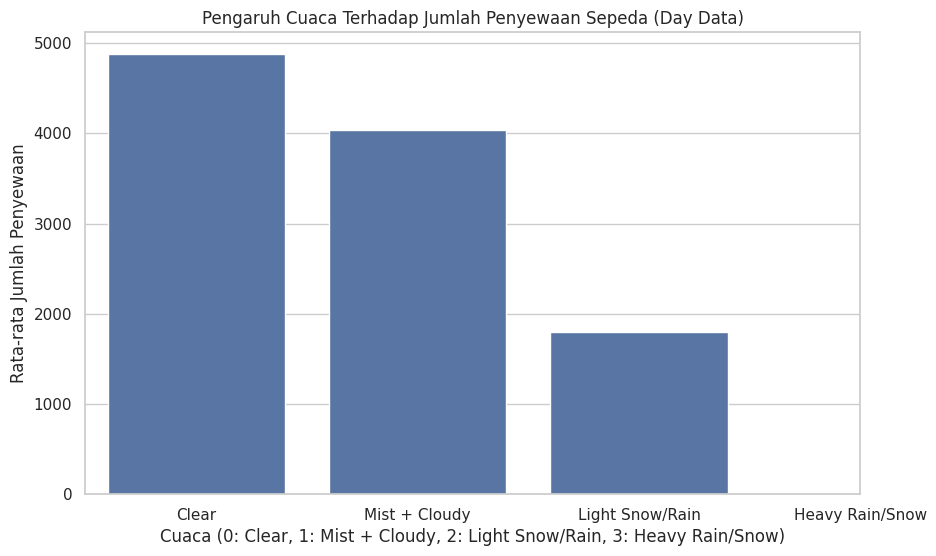

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None)
plt.title('Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda (Day Data)')
plt.xlabel('Cuaca (0: Clear, 1: Mist + Cloudy, 2: Light Snow/Rain, 3: Heavy Rain/Snow)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

### Pertanyaan 2: Apa pola penggunaan sepeda berdasarkan waktu (jam dan hari)?


<ipython-input-24-ae25ae8f0ac7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_data, ci=None)


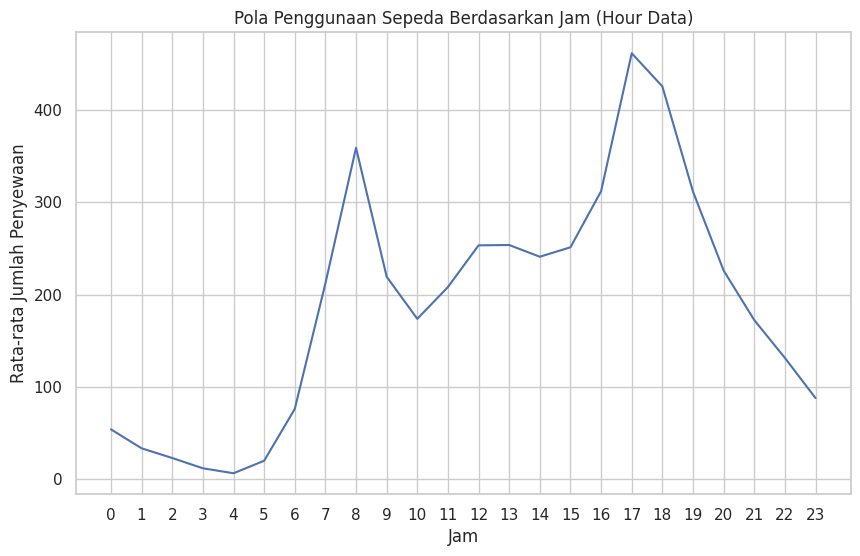

<ipython-input-24-ae25ae8f0ac7>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_data, ci=None)


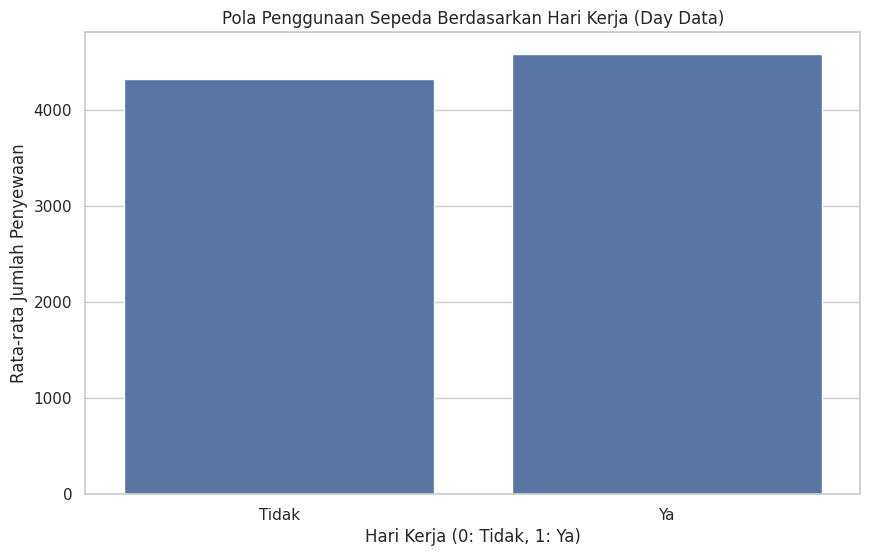

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data, ci=None)
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam (Hour Data)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))  # Mengatur label jam dari 0 sampai 23
plt.grid(True)
plt.show()

# Visualisasi penggunaan sepeda berdasarkan hari kerja (day_data)
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day_data, ci=None)
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari Kerja (Day Data)')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])
plt.show()

**Insight:**
- Pengaruh Cuaca: Cuaca cerah meningkatkan jumlah penyewaan sepeda, sedangkan cuaca buruk (hujan atau salju) mengurangi penyewaan.

- Pola Waktu Penggunaan: Penyewaan sepeda lebih tinggi pada jam sibuk (pagi dan sore) dan lebih banyak terjadi pada hari kerja dibandingkan hari libur.

## Analisis Lanjutan (Opsional)

In [ ]:
# RFM Analysis

# Menghitung Recency
recency = (day_data['dteday'].max() - day_data['dteday']).dt.days

# Menghitung Frequency dan Monetary
frequency = day_data['cnt'].count()
monetary = day_data['cnt'].sum()

# Membuat DataFrame untuk RFM
rfm_data = pd.DataFrame({
    'Recency': [recency.mean()],  # Mengambil rata-rata recency
    'Frequency': [frequency],  # Menghitung total frequency
    'Monetary': [monetary]  # Menghitung total monetary
})

# Menampilkan hasil RFM Analysis
print("RFM Analysis:")
print(rfm_data)


RFM Analysis:
   Recency  Frequency  Monetary
0    365.0        731   3292679


## Conclusion

- Conclution pertanyaan 1:

Cuaca sangat memengaruhi jumlah penyewaan sepeda. Saat cuaca cerah dan hangat, orang lebih banyak menyewa sepeda. Sebaliknya, saat hujan atau cuaca buruk, jumlah penyewaan menurun. Ini berarti penting bagi pengelola untuk memperhatikan cuaca dalam rencana pemasaran mereka. Misalnya, mereka bisa memberikan promo saat cuaca baik atau menyiapkan alternatif ketika cuaca buruk.

- Conclution pertanyaan 2:

Pola penggunaan sepeda menunjukkan bahwa banyak orang menyewa sepeda pada jam sibuk, seperti pagi dan sore hari. Ini menunjukkan bahwa mereka menggunakan sepeda untuk pergi ke tempat kerja atau sekolah. Selain itu, lebih banyak sepeda disewa di akhir pekan untuk bersenang-senang. Pengelola dapat meningkatkan layanan dan fasilitas pada waktu-waktu ini untuk menarik lebih banyak pengguna.